## Смыслов Дмитрий Олегович, ИУ5-25М

## Рубежный контроль №1: "Методы обработки данных"

### Номер варианта: 7

### Номер задачи №1: 7

### Номер задачи №2: 27

**Задача №7.**
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения медианой.

**Задача №27.**
Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе 5% и 95% квантилей.

**Дополнительные требования по группам:**

Для студентов группы **ИУ5-25М**, ИУ5И-25М, ИУ5-25МВ - для произвольной колонки данных построить парные диаграммы (pairplot).

Описание набора данных myanimelist/manga.csv - https://www.kaggle.com/datasets/andreuvallhernndez/myanimelist

Набор данных содержит информацию о манге с сайта-агрегатора MyAnimeList, добавленной до 7 августа 2023 года.

Содержит следующую основную информацию:
* title - название,
* type - тип (манга, манхва, новелла и др.)
* score - оценка пользователей сайта-агрегатора,
* status - статус (издается, в перерыве, закончено и др.)
* volumes - количество изданных томов,
* chapters - количество изданных глав,
* genres - жанры,
* themes - тематика,
* demographics - целевая аудитория (сёнэн, сёдзё и др.),
а также многие другие поля

### **Задача №7.**

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [28]:
data = pd.read_csv('/kaggle/input/myanimelist/manga.csv', sep=",")
data.shape

(64833, 30)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manga_id           64833 non-null  int64  
 1   title              64833 non-null  object 
 2   type               64833 non-null  object 
 3   score              24636 non-null  float64
 4   scored_by          64833 non-null  int64  
 5   status             64833 non-null  object 
 6   volumes            48211 non-null  float64
 7   chapters           46042 non-null  float64
 8   start_date         62950 non-null  object 
 9   end_date           51932 non-null  object 
 10  members            64833 non-null  int64  
 11  favorites          64833 non-null  int64  
 12  sfw                64833 non-null  bool   
 13  approved           64833 non-null  bool   
 14  created_at_before  64833 non-null  object 
 15  updated_at         62678 non-null  object 
 16  real_start_date    629

In [30]:
data.describe()

,manga_id,score,scored_by,volumes,chapters,members,favorites
count,64833.000000,24636.000000,64833.000000,48211.000000,46042.000000,64833.000000,64833.000000
mean,77098.238042,6.945179,686.997501,2.970090,21.186417,1758.756127,54.991440
std,48549.548139,0.520170,5514.493705,4.771116,53.896370,11083.107361,1057.059487
min,1.000000,2.440000,0.000000,1.000000,1.000000,3.000000,0.000000
25%,26466.000000,6.620000,7.000000,1.000000,5.000000,64.000000,0.000000
50%,85847.000000,6.910000,46.000000,1.000000,9.000000,190.000000,0.000000
75%,115701.000000,7.250000,261.000000,3.000000,19.000000,786.000000,3.000000
max,161613.000000,9.470000,394362.000000,200.000000,6477.000000,643969.000000,119470.000000


In [31]:
data_num_na = [
    c for c in data.columns 
    if data[c].dtype in ['float64', 'int64'] and data[c].isnull().sum() > 0]
data_num_na

['score', 'volumes', 'chapters']

In [32]:
[(
    c, 
    data[c].isnull().sum(),
    str(round(100 * data[c].isnull().mean(), 2)) + " %"
) for c in data_num_na]

[('score', 40197, '62.0 %'),
 ('volumes', 16622, '25.64 %'),
 ('chapters', 18791, '28.98 %')]

**Наименьшее количество пропусков в колонке 'volumes'. Для данной колонки заменим пропуски медианным значением**

In [33]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [34]:
all_data, _, _ = impute_column(data, 'volumes', 'median')
all_data

array([ 1.,  1., 24., ...,  4.,  1.,  1.])

In [35]:
data['volumes'].median()

1.0

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


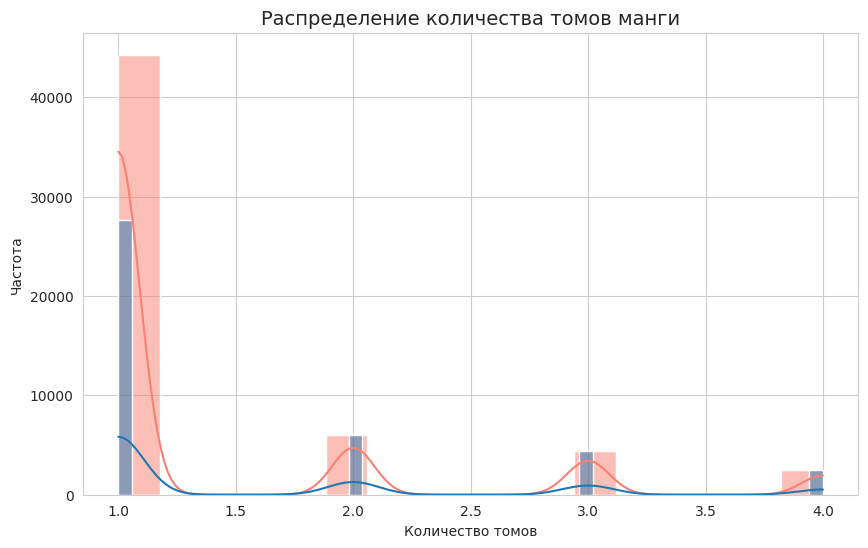

In [65]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(all_data[all_data < 5.], kde=True, color='salmon')
sns.histplot(data['volumes'][data['volumes'] < 5.], kde=True)
plt.title('Распределение количества томов манги', fontsize=14)
plt.xlabel('Количество томов')
plt.ylabel('Частота')
plt.show()

### **Задача №27.**

Для столбца 'score', который имеет похожее на нормальное распределение, заменим выбросы на значения 5%-95% квантилей.

In [36]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

<ipython-input-36-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


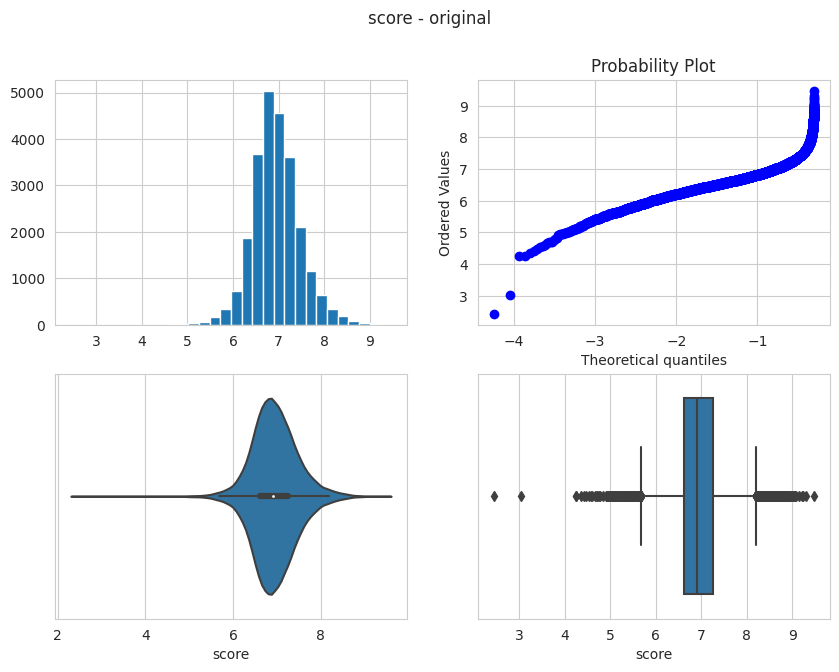

In [42]:
diagnostic_plots(data, 'score', 'score - original')

In [43]:
q_05 = data['score'].dropna().quantile(0.05)  # 5% квантиль
q_95 = data['score'].dropna().quantile(0.95)  # 95% квантиль
q_05, q_95

(6.16, 7.85)

In [45]:
new_data = data.copy()
new_data['score'] = data['score'].clip(lower=q_05, upper=q_95)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


<ipython-input-36-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


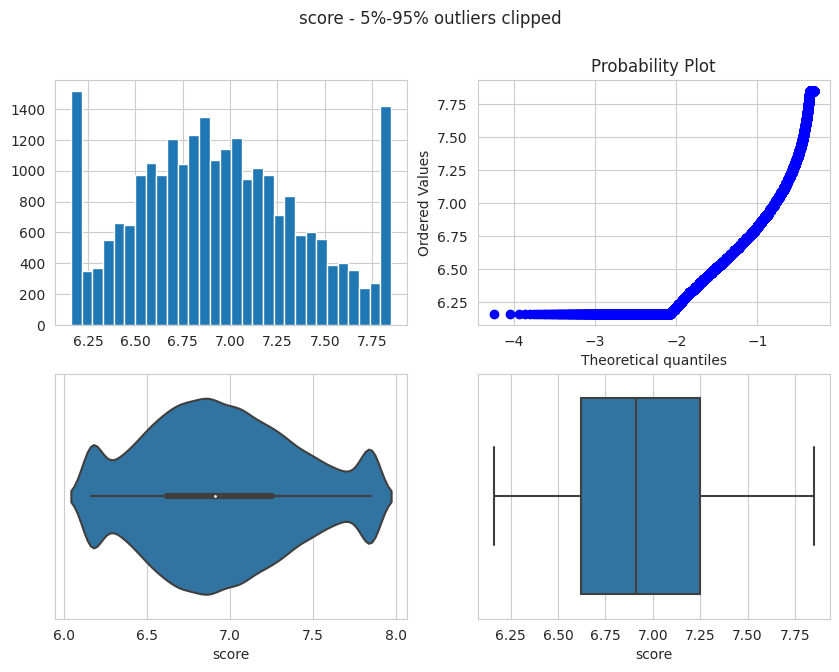

In [46]:
diagnostic_plots(new_data, 'score', 'score - 5%-95% outliers clipped')

### **Дополнительные требования по группам:**

Для колонки 'score' построим парные диаграммы с другими численными столбцами

In [58]:
[
    c for c in data.columns 
    if data[c].dtype in ['float64', 'int64']
]

['manga_id',
 'score',
 'scored_by',
 'volumes',
 'chapters',
 'members',
 'favorites']

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


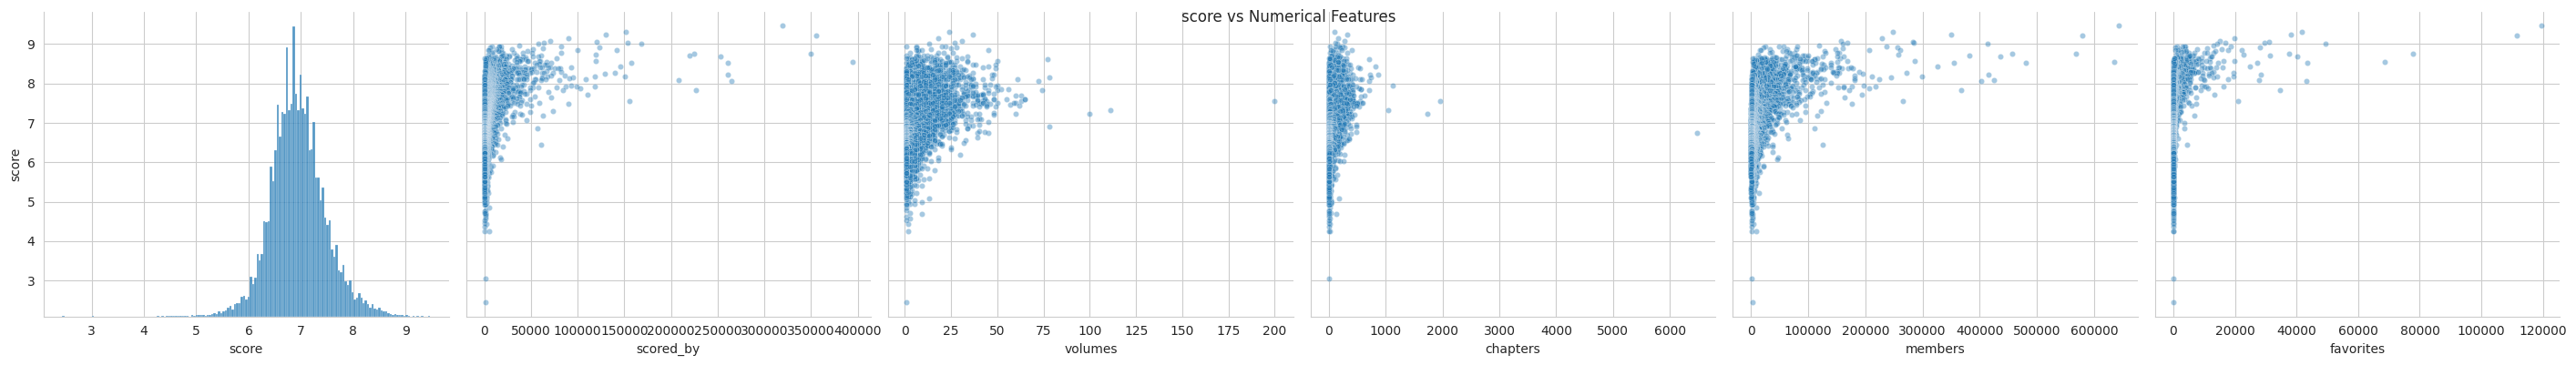

In [59]:
numerical_cols = [
    'score',
    'scored_by',
    'volumes',
    'chapters',
    'members',
    'favorites'
]
sns.pairplot(
    data=data,
    x_vars=numerical_cols,
    y_vars=['score'],
    plot_kws={'alpha': 0.4, 's': 20},
    height=4,
    aspect=1.2
)
plt.suptitle('score vs Numerical Features')
plt.show()